In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

### Problem 1: You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

**Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.**

**Laoding the Dataset**

In [2]:
election = pd.read_excel("Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

**Reading 1st five Rows of the Dataset**

In [3]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


**Reading Last 5 Rows of the Dataset**

In [4]:
election.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


**Getting info of the Dataset**

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


* There are 1525 Rows and 10 columns present in the dataset.
* There is no Missimg Value present as all the columns have 1525 Non-Null enteries.
* There are 8 integer type column and 2 object type column.
* There is one Unnamed column which need to be droped.
* Some of the column name has dot character/symbol in between which need to be corrected/renamed.

**Five point Summary : Statistical Summary**

In [6]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


* In Age and Hague Column the Mean is greater than median indicating that data is slightly Right skewed.
* There is no Anomalies present in the Dataset.
* Age of Voters range from minimum 24 years to max 93 years.
* Many voters have No Political Knowledge having a score of 0.

**Dropping Column Unnamed**

In [7]:
election.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
election.shape

(1525, 9)

**Sample of the Dataset after dropping column**

In [9]:
# Displaying 1st five rows of the dataset.

election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [10]:
# Displaying last five rows of the dataset.

election.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


**Checking for Null Value**

In [11]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

* There are No Null value present in the dataset.


**Check for duplicate data**

In [12]:
dups = election.duplicated()
# print("Number of Duplicates Rows present: ",dups.sum())
print("There are {} duplicate Rows present in the Dataset".format(dups.sum()))
election[dups]

There are 8 duplicate Rows present in the Dataset


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


**Removing Duplicate Rows:**

In [13]:
election.drop_duplicates(inplace=True)
dups = election.duplicated().sum()
print(f"The Number of duplicate Rows present in the Dataset is = ",dups)

The Number of duplicate Rows present in the Dataset is =  0


In [14]:
election.shape

(1517, 9)

**Renaming Column Names:**

In [15]:
election.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [16]:
election.rename({"economic.cond.national":"economic_cond_national",
                 "economic.cond.household":"economic_cond_household",
                "political.knowledge":"political_knowledge"},axis=1,inplace=True)

In [17]:
election.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

**Geting unique counts of all object datatype:**

In [18]:
for feature in election.columns:
    if election[feature].dtype=='object':
        print(feature,"---->")
        print(election[feature].value_counts())
        print("\n")

vote ---->
vote
Labour          1057
Conservative     460
Name: count, dtype: int64


gender ---->
gender
female    808
male      709
Name: count, dtype: int64




* There are No anomalies present in the Categorical column.

In [19]:
election['vote'].value_counts(normalize=True)

vote
Labour          0.69677
Conservative    0.30323
Name: proportion, dtype: float64

In [20]:
election.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [21]:
for feature in election.iloc[:,2:8]:
    print(feature,"---->")
    print(election[feature].value_counts())
    print("\n")

economic_cond_national ---->
economic_cond_national
3    604
4    538
2    256
5     82
1     37
Name: count, dtype: int64


economic_cond_household ---->
economic_cond_household
3    645
4    435
2    280
5     92
1     65
Name: count, dtype: int64


Blair ---->
Blair
4    833
2    434
5    152
1     97
3      1
Name: count, dtype: int64


Hague ---->
Hague
2    617
4    557
1    233
5     73
3     37
Name: count, dtype: int64


Europe ---->
Europe
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: count, dtype: int64


political_knowledge ---->
political_knowledge
2    776
0    454
3    249
1     38
Name: count, dtype: int64




* There are No anomalies present in the column having ordinal values.


**Checking Skewness:**

In [22]:
election.skew(numeric_only=True)

age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
dtype: float64

**Inferences:**

* Here the column age and Hauge are slightly Right Skewed.
* Rest all other columns are Left Skewed.

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)


In [23]:
election.head(1)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female


**Null Value Check**

In [24]:
election.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

* There are no Null values present in the Dataset.

**Shape of the Dataset**

In [25]:
print("Number of Rows present in the Dataset: ",election.shape[0])
print("Number of Columns present in the Dataset: ",election.shape[1])

Number of Rows present in the Dataset:  1517
Number of Columns present in the Dataset:  9


**Checking Datatypes**

In [26]:
election.dtypes

vote                       object
age                         int64
economic_cond_national      int64
economic_cond_household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political_knowledge         int64
gender                     object
dtype: object

**Univariate Analysis:**

**Countplot for Categorical Variables:**

In [27]:
cols = election.select_dtypes(include='object').columns
cols

Index(['vote', 'gender'], dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1354169764.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


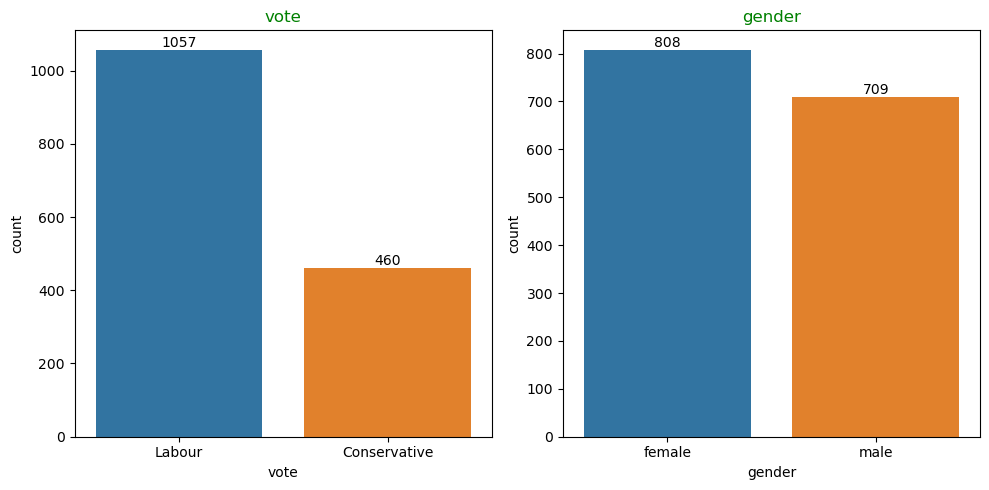

In [28]:
fig = plt.figure(figsize=(10,5))
cols = election.select_dtypes(include='object').columns
for i in range(0,len(cols)):
    plt.subplot(1,2,i+1)
    ax=sns.countplot(data=election,x=election[cols[i]],order=election[cols[i]].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars)
        plt.title("{}".format(cols[i]),color='green')
        plt.tight_layout()

**Inferences:**

* The number of voters for Labour party is more than double as compared to Conservative Party.
* Female voters are more than Male.

In [29]:
election.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

**Pie-chart for Assessment of current national economic conditions:**

* A participant who is given a score of 5 for the current national economic translates to him/her perceiving the economic conditions to be very good.

Here 5 stands for High Score and 1 for Poor Score


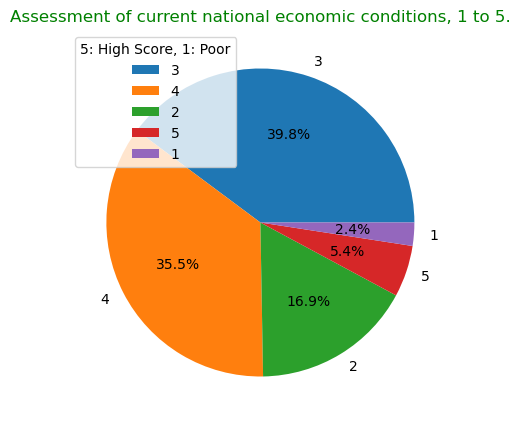

In [30]:
plt.figure(figsize=(5,5))
label = election["economic_cond_national"].value_counts().keys()
plt.pie(data=election,x=election["economic_cond_national"].value_counts(),labels=label,autopct="%.1f%%")
plt.title("Assessment of current national economic conditions, 1 to 5.",color='green')
print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(title = "5: High Score, 1: Poor",loc='upper left')
plt.show()


**Insights:**

* Only 5.4% of the voters have been given a High score of 5 perceiving the national economic conditions to be Very Good.
* only 2.4% of the voters have very low national economic conditions having a score of 1.
* 16.9% of the voters have score 2 for the current national economic conditions.
* 39.8% of the voters have score 3 for the current national economic conditions.
* 35.5%% of the voters have score 4 for the current national economic conditions.

**Pie-chart for Assessment of current Household economic conditions:**			

* A participant who is given a score of 5 for the current household economic translates to him/her perceiving the economic conditions to be very good.

Here 5 stands for High Score and 1 for Poor Score


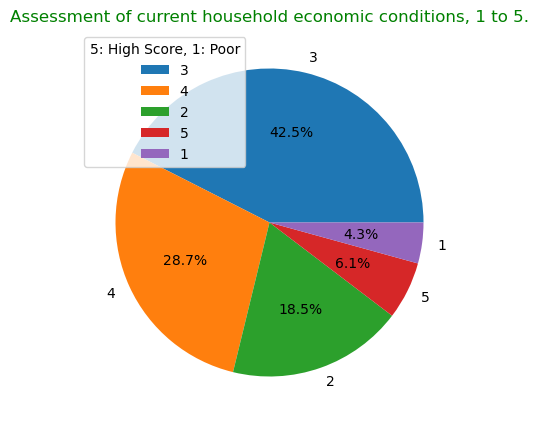

In [31]:
plt.figure(figsize=(5,5))
label = election['economic_cond_household'].value_counts().keys()
plt.pie(data=election,x=election["economic_cond_household"].value_counts(),labels=label,autopct="%.1f%%")
plt.title("Assessment of current household economic conditions, 1 to 5.",color='green')
print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(title = "5: High Score, 1: Poor",loc='upper left')

plt.show()

**Insights:**

* Only 6.1% of the voters have been given a High score of 5 perceiving the household economic             conditions to be Very Good.
* only 4.3% of the voters have very low household economic conditions having a score of 1.
* 18.5% of the voters have score 2 for the current household economic conditions.
* 42.5% of the voters have score 3 for the current household economic conditions.
* 28.7%% of the voters have score 4 for the current household economic conditions.

**Histograms**

C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_9228\1634139504.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


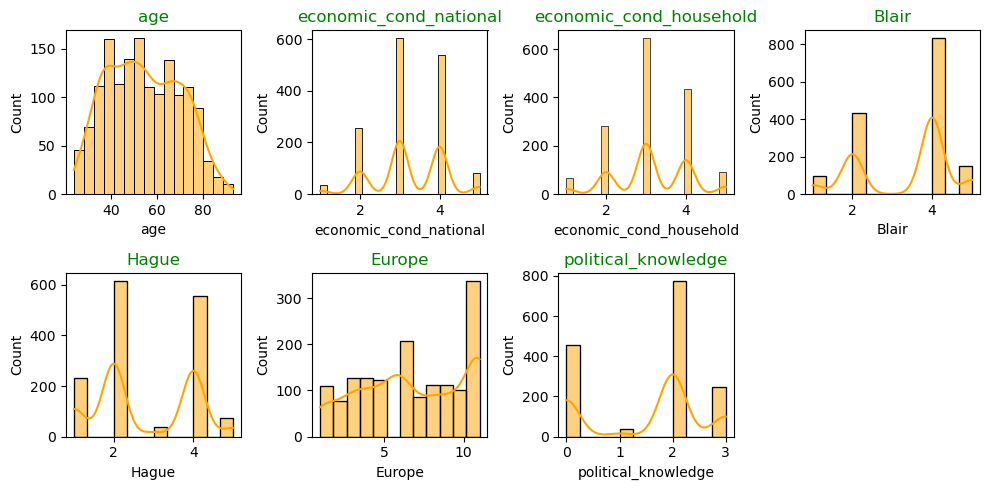

In [34]:
plt.figure(figsize=(10,5))
#col = ["economic.cond.national","economic.cond.household","Blair","Hague","age","Europe",
    #   "political.knowledge"]
col = election.iloc[:,1:8].columns
for i in range(0,len(col)):
    plt.subplot(2,4,i+1)
    sns.histplot(data=election,x=election[col[i]],kde=True,color='orange')
    plt.title("{}".format(col[i]),color="green")
    plt.tight_layout()
#sns.histplot(data=election,x='Blair',kde=True,color='green')

**Inferences:**

* AGE of voters ranges from 24 years to 93 years.
* AGE is also Right skewed.
* Most of the voters have Moderate NATIONAL ECONOMIC CONDITION having a score of 3 and 4.
* Also most of the voters have Moderate HOUSEHOLD ECONOMIC CONDITION having a score of 3 and 4.
* Most of the voter having a score of 4 in BLAIR (Assessment of the Labour leader).
* Most of the voter having a score of 2 and 4 in HAGUE (Assessment of the Conservative leader).
* Most of the Voters Represents 'EUROSCEPTIC SENTIMENT'.
* Maximum voters have FAIR POLITICAL KNOWLEDGE having a score of 2 and very few voters have HIGH POLITICAL KNOWLEDGE having a score of 3.
* Also EUROPE column is Left skewed.

**Boxplot of Numerical columns:**

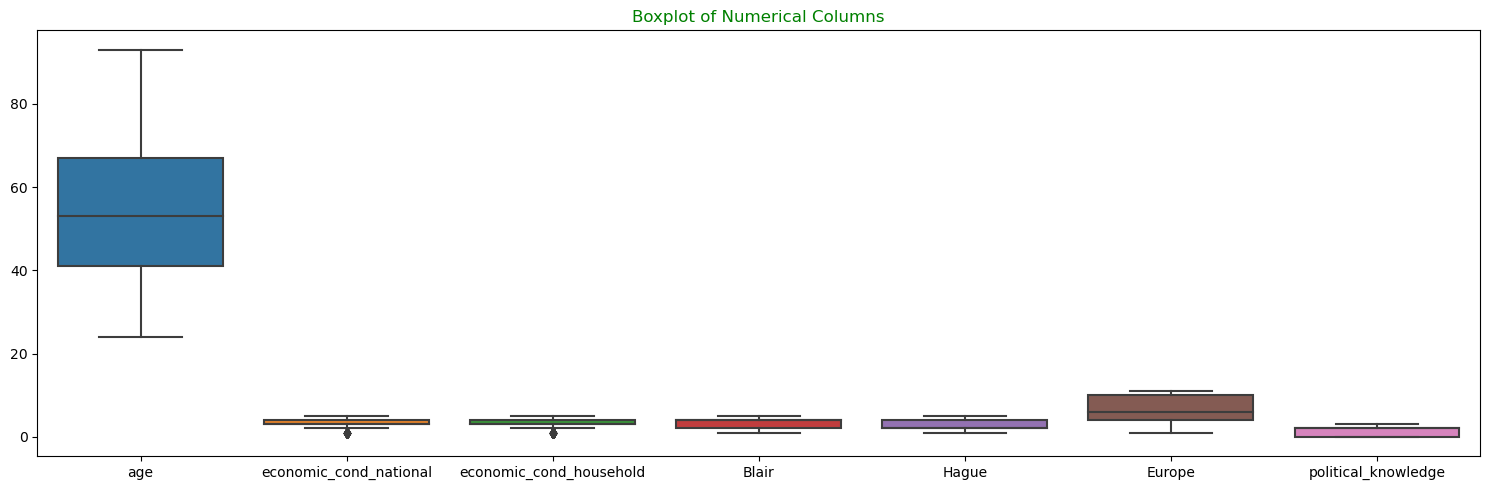

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(election)
plt.title("Boxplot of Numerical Columns",color='green')
plt.tight_layout()

**Inferences:**

* Outlier is present only in Columns 'economic_cond_national' and economic_cond_household'.
* Age of Voters range from minimum 24 years to max 93 years.

**Bivariate Analysis:**

**Vote Vs Economical_cond_national**

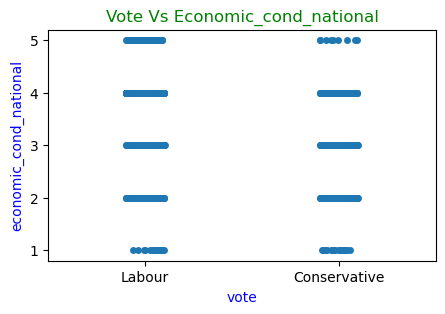

In [36]:
plt.figure(figsize=(5,3))
sns.stripplot(x=election["vote"],y=election["economic_cond_national"])
plt.title("Vote Vs Economic_cond_national",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("economic_cond_national",color='blue')
plt.show()

**Inferences:**

* There is no such relationship between economic_cond_national and vote.

**Vote Vs Economical_cond_household**

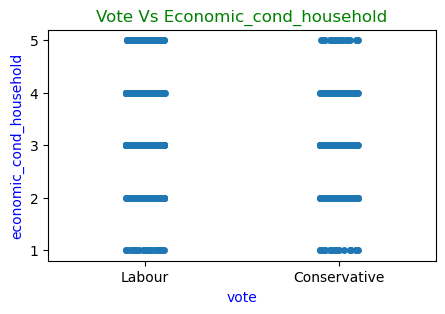

In [37]:
plt.figure(figsize=(5,3))
sns.stripplot(x=election["vote"],y=election["economic_cond_household"])
plt.title("Vote Vs Economic_cond_household",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("economic_cond_household",color='blue')
plt.show()

**Inferences:**

* There is no such relationship between economic_cond_household and vote.

**Vote Vs Blair**

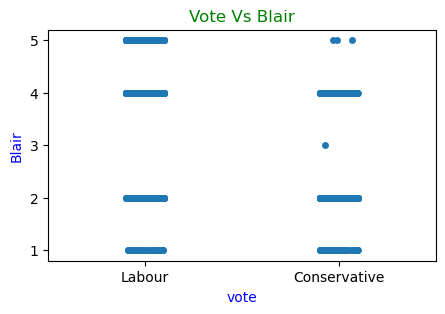

In [38]:
plt.figure(figsize=(5,3))
sns.stripplot(x=election["vote"],y=election["Blair"])
plt.title("Vote Vs Blair",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("Blair",color='blue')
plt.show()

**Inferences:**

* There is no such relationship between Blair and vote.

**Vote Vs Hague**

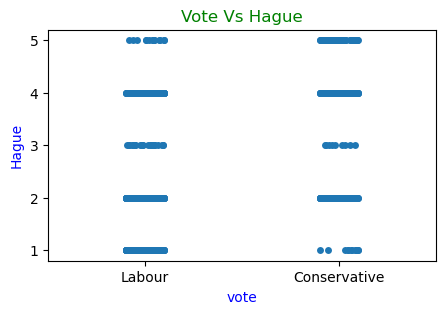

In [39]:
plt.figure(figsize=(5,3))
sns.stripplot(x=election["vote"],y=election["Hague"])
plt.title("Vote Vs Hague",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("Hague",color='blue')
plt.show()

* **Inferences:**

* There is no such relationship between Hauge and vote.

**Vote Vs political_knowledge**

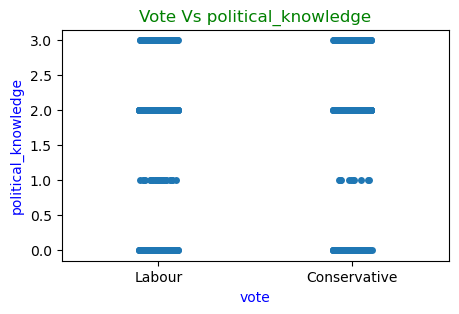

In [40]:
plt.figure(figsize=(5,3))
sns.stripplot(x=election["vote"],y=election["political_knowledge"])
plt.title("Vote Vs political_knowledge",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("political_knowledge",color='blue')
plt.show()

**Inferences:**

* There is no such relationship between plolitical_knowledge and vote.

**Countplot:**

In [41]:
election.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

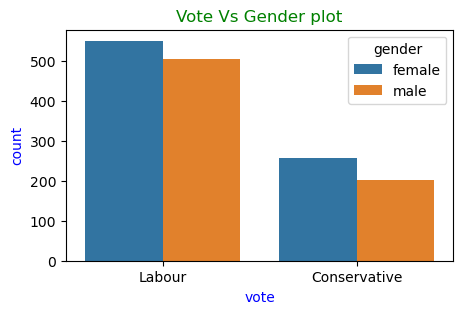

In [42]:
#fig, axes = plt.subplots(nrows=1,ncols=2)
plt.figure(figsize=(5,3))
sns.countplot(data=election,x='vote',hue="gender")
plt.title("Vote Vs Gender plot",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("count",color='blue')
plt.show()

**Inferences:**

* Maximum female choose Labour party over Conservative.
* Maximum voters have their party choice as Labour.

**Boxplot**

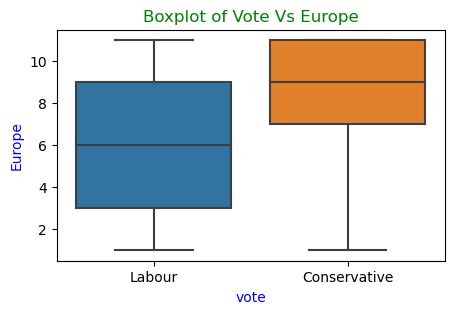

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(x=election['vote'],y=election['Europe'])
plt.title("Boxplot of Vote Vs Europe",color='green')
plt.xlabel("vote",color ='blue')
plt.ylabel("Europe",color='blue')
plt.show()

**Inferences:**

* Distribution is larger for Labour party as compared to Conservative Party.
* Maximum voters with ‘Eurosceptic sentiment' vote for conservative party.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


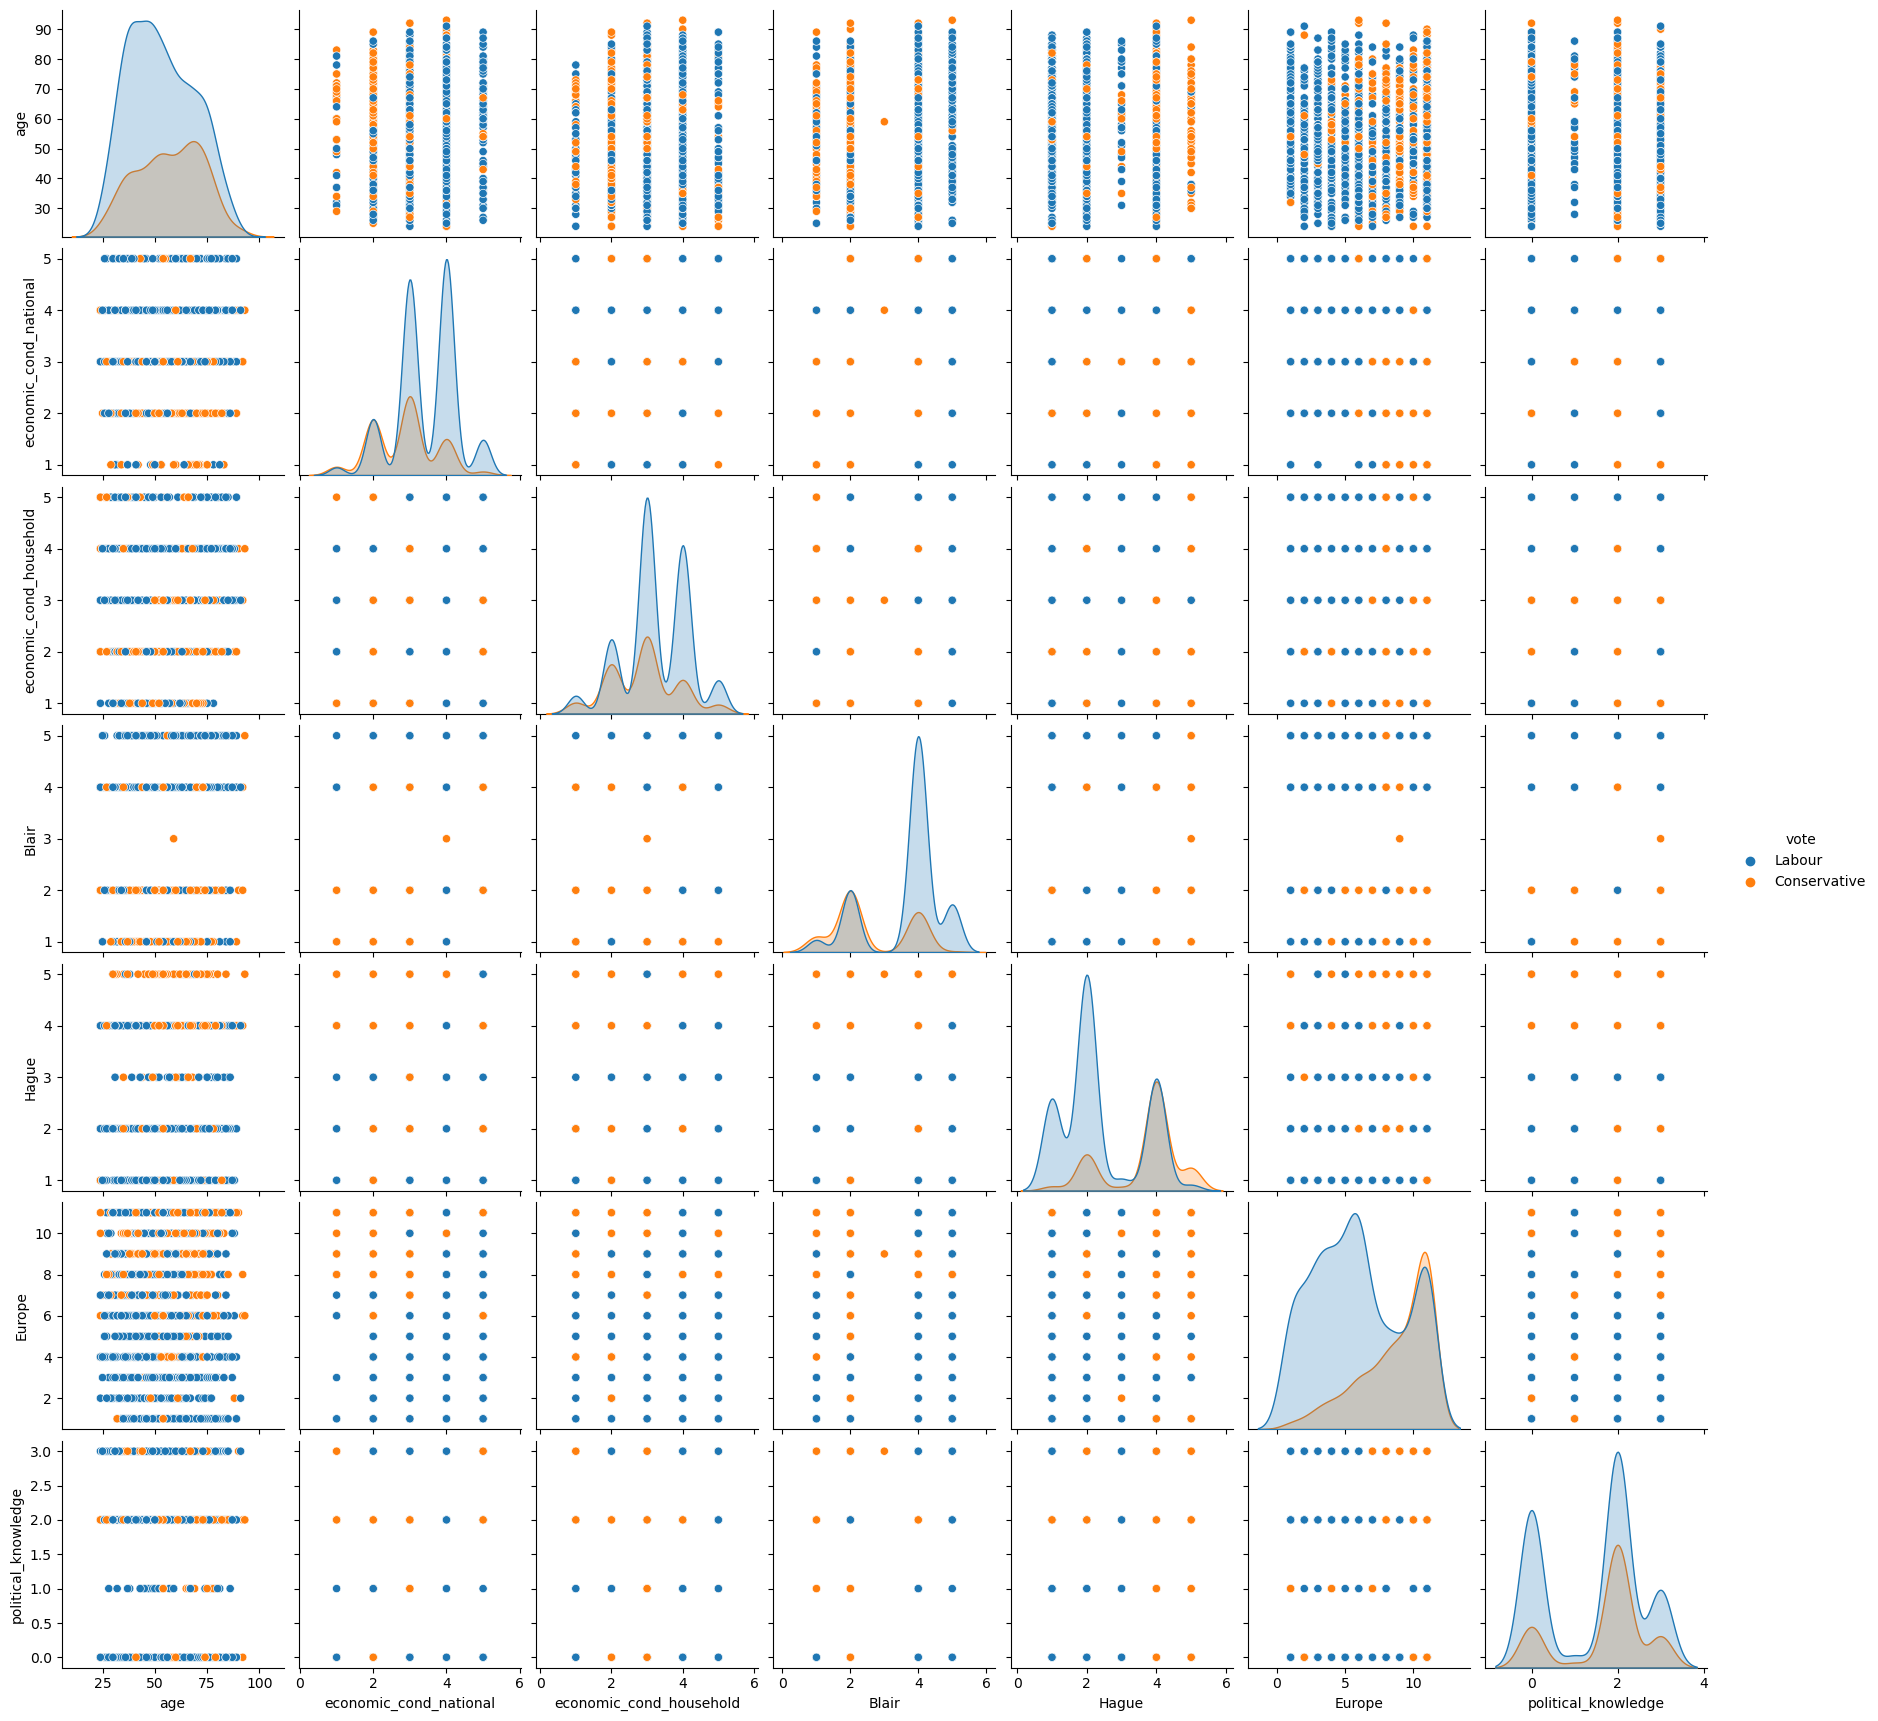

In [44]:
sns.pairplot(election,hue="vote")
plt.show()

**Inferences:**

* There is no strong relationship between the variables.
* No variables has a Linear relationship amongst them.
* There is no issue of multicollinearity present in the dataset as there are no strong correlataions amongst the variables.

**Checking for Correlations:**

In [45]:
election.corr(numeric_only=True)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic_cond_national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic_cond_household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political_knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


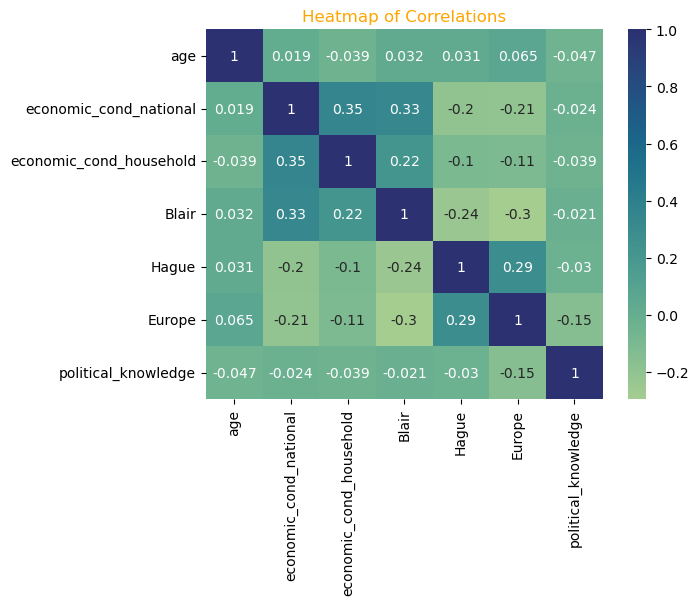

In [46]:
sns.heatmap(election.corr(numeric_only=True), annot=True, cmap='crest')
plt.title("Heatmap of Correlations",color='orange')
plt.show()

**Inferences:**

* The magnitude of correlation between economic_cond_national and economic_cond_household is 0.35, its a modereate correlation.
* The magnitude of correlation between economic_cond_national and Blair is 0.33.
* There is no such strong correlation between any variables.

**Checking for Outliers:**

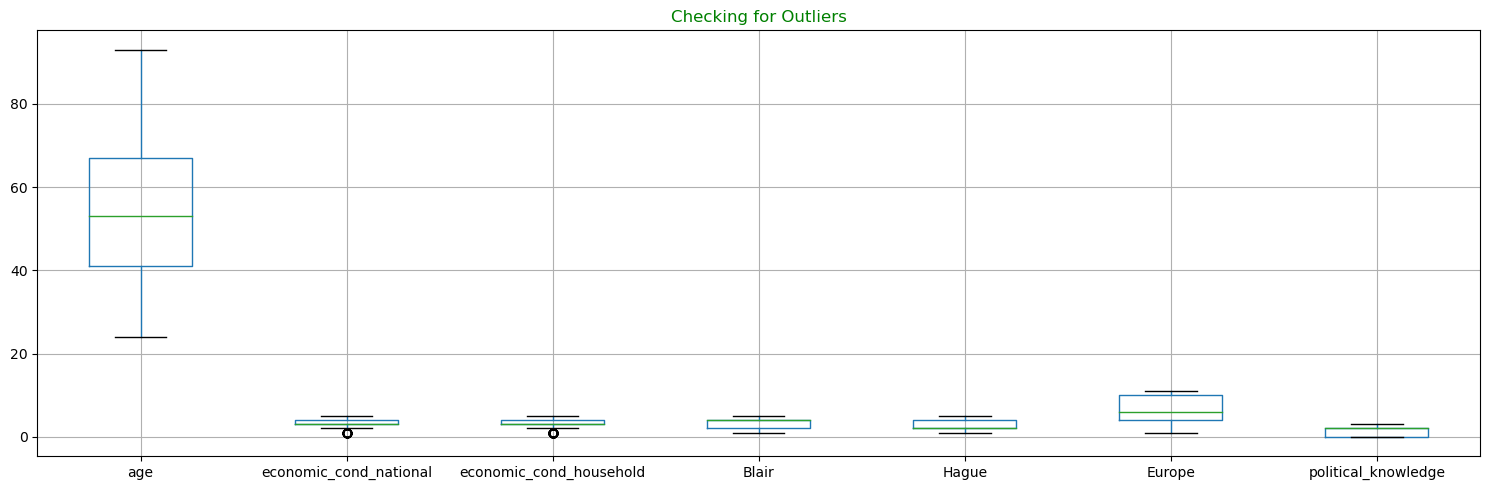

In [47]:
plt.figure(figsize=(15,5))
election.boxplot()
plt.title("Checking for Outliers",color='green')
plt.tight_layout()

* Outliers are present in economic_cond_national and economic_cond_household.
* There seem to be outliers present on the border line of the lower quarter.

**Outlier proportions**

In [48]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [49]:
remove_outlier(election['economic_cond_national'])

(1.5, 5.5)

In [50]:
remove_outlier(election['economic_cond_household'])

(1.5, 5.5)

In [51]:
election[['economic_cond_national','economic_cond_household']].describe().T

,count,mean,std,min,25%,50%,75%,max
economic_cond_national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0


**Observations**

* Since the columns having Outlier are ordinal in nature so there is no need to treat outliers in this case.
* Outliers are present on the lower side only and having Min value as 1 and lower limit as 1.5.
* Also there is not huge difference between the min value and lower_range so Outlier treatment is not Necessary here.
* We will not Treat the Outliers here in this case.

### Data Preparation: 

**1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)**

**Encoding the data using 'get_dummies' method:**

* As the machine learning model cannot work with string values so we will encode the categorical variables and convert their datatype to interger.
* We will do dummy encoding for vote and Gender column.

In [52]:
election.head(1)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female


In [53]:
election = pd.get_dummies(election,columns=['vote','gender'],drop_first=True)

In [54]:
election.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,True,False
1,36,4,4,4,4,5,2,True,True
2,35,4,4,5,2,3,2,True,True
3,24,4,2,2,1,4,0,True,False
4,41,2,2,1,1,6,2,True,True


**Checking the datatype after encoding:**

In [55]:
election.dtypes

age                        int64
economic_cond_national     int64
economic_cond_household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political_knowledge        int64
vote_Labour                 bool
gender_male                 bool
dtype: object

**Renaming the columns:**

In [56]:
election.rename(columns={'vote_Labour':'is_Labour','gender_male':'is_Male'},inplace=True)

In [57]:
election.head(1)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,is_Labour,is_Male
0,43,3,3,4,1,2,2,True,False


* After encoding party 'Labour' is Encoded as 1 and 'conservative' as 0.
* 'Male' is encoded as 1 and 'Female' as 0.

**Is Scaling Necessary:**

* Scaling is a necessity when using Distance-based models such as KNN etc. Scaling can be done on continuous and ordinal variables. 
* Scaling is performed when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. 
* Here we need scaled data only for KNN model and it is not required to scale the data for all other model but there is no harm in performing all the model on scaled data, hence proceeding with scaled data.
* After scaling the data is transformed having mean as 0 and standard deviation as 1.

* we will try to build the model using both scaled and unscaled data to see what difference it makes.
* Scaling is to be done After Train Test split.


**Splitting the data into Train Test Split:**

In [58]:
X = election.drop("is_Labour",axis = 1)
y = election.pop("is_Labour")

**Train-Test Split:**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [60]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [61]:
y_train.value_counts(normalize=True)

is_Labour
True     0.71065
False    0.28935
Name: proportion, dtype: float64

In [62]:
y_test.value_counts(normalize=True)

is_Labour
True     0.664474
False    0.335526
Name: proportion, dtype: float64

**Scaling the Data using StandardScaler:**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Training Data Scaled:**

In [66]:
X_train_sc_df =pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_sc_df.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,is_Male
0,-1.296710,-1.455581,0.902100,-2.018037,1.029070,1.332089,0.452231,-0.936950
1,-0.910337,0.877307,-0.163744,0.550300,1.029070,-0.202156,-1.407526,1.067292
2,0.441968,0.877307,-0.163744,0.550300,1.029070,0.104693,0.452231,-0.936950
3,-0.459569,-0.289137,-0.163744,0.550300,-0.593283,1.332089,-1.407526,1.067292
4,-0.652755,2.043751,-0.163744,0.550300,-0.593283,0.411542,-1.407526,1.067292


**Test data Scaled:**

In [67]:
X_test_sc_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_sc_df.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,is_Male
0,1.085923,-0.289137,-0.163744,-1.161925,-0.593283,0.411542,0.452231,-0.936950
1,-0.717151,-0.289137,-1.229589,0.550300,-0.593283,0.411542,1.382110,1.067292
2,2.245042,2.043751,1.967945,1.406413,-0.593283,-1.736401,0.452231,1.067292
3,-0.459569,-1.455581,-0.163744,-1.161925,1.029070,0.411542,0.452231,-0.936950
4,-1.361106,2.043751,0.902100,0.550300,1.029070,0.411542,-1.407526,1.067292


## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

## Logistic Regression

**Model Building without Scaling the data:**

In [68]:
lgt = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=-1)
lgt_model = lgt.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished


**Predicting on Training and Test dataset:**

In [69]:
ytrain_pred = lgt_model.predict(X_train)
ytest_pred = lgt_model.predict(X_test)

In [70]:
ytrain_pred

array([False,  True,  True, ...,  True,  True,  True])

In [71]:
ytest_pred

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,

**Model Evaluation:**

**Accuracy of Training and Test Data.**


In [72]:
print("Accuracy of the Training Data: ",lgt_model.score(X_train,y_train))
print("Accuracy of the Test Data: ",lgt_model.score(X_test,y_test))

Accuracy of the Training Data:  0.8312912346842601
Accuracy of the Test Data:  0.8355263157894737


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Building Model With Scaled data**

In [73]:
lgt_sc = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=-1)
lgt_scaled = lgt_sc.fit(X_train_sc_df,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [74]:
ytrain_pred1 = lgt_scaled.predict(X_train_sc_df)
ytest_pred1 = lgt_scaled.predict(X_test_sc_df)

**Accuracy of Train and Test data:**

In [75]:
print("Accuracy of the Training Data: ",lgt_scaled.score(X_train_sc_df,y_train))
print("Accuracy of the Test Data: ",lgt_scaled.score(X_test_sc_df,y_test))

Accuracy of the Training Data:  0.8312912346842601
Accuracy of the Test Data:  0.8355263157894737


**We observe that Accuracy of the Model is same With scaled data and Unscaled data**

**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

## Linear Discriminant Analysis 

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Model building without Scaling**

* Building the LDA model with the Default Parameter.

In [77]:
lda = LinearDiscriminantAnalysis()

In [78]:
lda_model = lda.fit(X_train,y_train)

**Accuracy of Train and Test data:**

In [79]:
print("Accuracy of the Training Data: ",lda_model.score(X_train,y_train))
print("Accuracy of the Test Data: ",lda_model.score(X_test,y_test))

Accuracy of the Training Data:  0.8341187558906692
Accuracy of the Test Data:  0.8333333333333334


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Model building with Scaled data**

In [80]:
lda_sc = LinearDiscriminantAnalysis()
lda_scaled = lda_sc.fit(X_train_sc_df,y_train)

**Accuracy of Train and Test data:** 

In [81]:
print("Accuracy of the Training Data: ",lda_scaled.score(X_train_sc_df,y_train))

print("Accuracy of the Test Data: ",lda_scaled.score(X_test_sc_df,y_test))

Accuracy of the Training Data:  0.8341187558906692
Accuracy of the Test Data:  0.8333333333333334


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Conclusions:**

**Accuracy of the model is same for Scaled and unscaled data.**

**comparison of Logistic and LDA model**


In [82]:
a = lgt_model.score(X_train,y_train)
b = lgt_model.score(X_test,y_test)
c = lda_model.score(X_train,y_train)
d = lda_model.score(X_test,y_test)

In [83]:
# pd.DataFrame()
data = {'LR':[a,b] ,'LDA':[c,d]}
pd.DataFrame(data=data,  index=['Train_Accuracy','Test_Accuracy'])

,LR,LDA
Train_Accuracy,0.831291,0.834119
Test_Accuracy,0.835526,0.833333


**Inferences**

* Accuracy of both the Logistic and LDA model are almost the same.
* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

* Since KNN is a distance based algorithm so we will build the model with Scaled data.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

**KNN Without Scaling**

In [85]:
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_model3 = knn.fit(X_train,y_train)
# evaluate accuracy
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_model3.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model3.score(X_test, y_test))


# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_model5 = knn.fit(X_train,y_train)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_model5.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model5.score(X_test, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_model7 =knn.fit(X_train,y_train)
#print("Accuracy Score for K=7 is ", knn_model.score(X_test, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_model7.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model7.score(X_test, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn_model9 = knn.fit(X_train,y_train)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_model9.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model9.score(X_test, y_test))

For K = 3 -------> 
Accuracy Score for Training Data is:  0.8699340245051838
Accuracy Score for Test Data is:  0.7894736842105263

For K = 5 -------> 
Accuracy Score for Training Data is:  0.8557964184731386
Accuracy Score for Test Data is:  0.8245614035087719

For K = 7 -------> 
Accuracy Score for Training Data is:  0.8444863336475024
Accuracy Score for Test Data is:  0.8267543859649122

For K = 9 -------> 
Accuracy Score for Training Data is:  0.8435438265786993
Accuracy Score for Test Data is:  0.8070175438596491


**KNN With Scaling**

In [86]:
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_model_sc3 = knn.fit(X_train_sc_df,y_train)
# evaluate accuracy
#print("Accuracy Score for K=3 is ", knn_model.score(X_test_sc_df, y_test))
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc3.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc3.score(X_test_sc_df, y_test))

# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_model_sc5 = knn.fit(X_train_sc_df,y_train)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test_sc_df, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc5.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc5.score(X_test_sc_df, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_model_sc7 =knn.fit(X_train_sc_df,y_train)
#print("Accuracy Score for K=9 is ", knn_model.score(X_test_sc_df, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc7.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc7.score(X_test_sc_df, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors = 9, metric='euclidean')
knn_model_sc9 =knn.fit(X_train_sc_df,y_train)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc9.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc9.score(X_test_sc_df, y_test))


For K = 3 -------> 
Accuracy Score for Training Data is:  0.8699340245051838
Accuracy Score for Test Data is:  0.8092105263157895

For K = 5 -------> 
Accuracy Score for Training Data is:  0.8539114043355325
Accuracy Score for Test Data is:  0.8245614035087719

For K = 7 -------> 
Accuracy Score for Training Data is:  0.8473138548539114
Accuracy Score for Test Data is:  0.8157894736842105

For K = 9 -------> 
Accuracy Score for Training Data is:  0.8444863336475024
Accuracy Score for Test Data is:  0.8201754385964912


**Accuracy is Better with scaled data for KNN classifier.**

* Here K=9 is giving Better Accuracy.

**validness of models (over fitting or under fitting):**




* The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.

## Naive Bayes Model

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
NB = GaussianNB()

In [89]:
NB_model = NB.fit(X_train,y_train)

**Accuracy of the Train and Test data:**

In [90]:
print("Accuracy Score for Training Data is: ", NB_model.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", NB_model.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8350612629594723
Accuracy Score for Test Data is:  0.8223684210526315


**validness of models (over fitting or under fitting):**

* The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.

**comparison of KNN and Naive Bayes model**

In [91]:
a = knn_model_sc9.score(X_train_sc_df, y_train)
b = knn_model_sc9.score(X_test_sc_df, y_test)
c = NB_model.score(X_train,y_train)
d = NB_model.score(X_test,y_test)

In [92]:
# pd.DataFrame()
data = {'KNN':[a,b] ,'Naive_Bayes':[c,d]}
pd.DataFrame(data=data,  index=['Train_Accuracy','Test_Accuracy'])

,KNN,Naive_Bayes
Train_Accuracy,0.844486,0.835061
Test_Accuracy,0.820175,0.822368


**Conclusions:**

* The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.
* Naive bayes model is less overfit than KNN model.

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

* Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

## Introduction to Hyper-parameter tuning using Grid Search.

* Model tuning is implemented for the main purpose of obtaining the highest possible accuracy in machine learning, which in turn helps in making the most optimized business decisions.
* The main reason of using Hyper-parameters is to increase the performance of oue model.

### Applying GridSearchCV for Logistic Regression:

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid = {'penalty':['l2'],
        'solver':['newton-cg','liblinear','lbfgs','sag'],
        'tol':[0.0001,0.00001]}

In [95]:
model = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1,scoring='f1',verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [96]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1,
                   solver='liblinear')


In [97]:
grid_search.cv_results_['params']

[{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001},
 {'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-05},
 {'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001},
 {'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05},
 {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001},
 {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05},
 {'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001},
 {'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}]

In [98]:
grid_search.cv_results_['mean_test_score']

array([0.88285528, 0.88285528, 0.88361773, 0.88361773, 0.88285528,
       0.88285528, 0.88231536, 0.88200242])

* We found the best parameters for our Logistic regression model using GridSearchCV.
* Now we will built the model using these parameters.

**Building model on Best parameters**

In [99]:
best_model_lgt = grid_search.best_estimator_

In [100]:
best_model_lgt

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1,
                   solver='liblinear')

**Accuracy of Train and Test data:**

In [101]:
print("Accuracy on Train Data: ",best_model_lgt.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_lgt.score(X_test,y_test))

Accuracy on Train Data:  0.8369462770970783
Accuracy on Test Data:  0.8289473684210527


**Comparison of Accuracy of Base and Tuned Model**

In [102]:
a = lgt_model.score(X_train,y_train)
b = lgt_model.score(X_test,y_test)
c = best_model_lgt.score(X_train,y_train)
d = best_model_lgt.score(X_test,y_test)

In [103]:
# pd.DataFrame()
data = {'Base_Model':[a,b] ,'Tuned_model':[c,d]}
pd.DataFrame(data=data,  index=['Train_Accuracy','Test_Accuracy'])

,Base_Model,Tuned_model
Train_Accuracy,0.831291,0.836946
Test_Accuracy,0.835526,0.828947


**Conclusions:**

* Base model is neither overfit nor underfit.
* Tuned model is slightly overfit.

### GridSearchCV for KNearestNeighbours(KNN):


**Applying GridSearchCV for KNN:**

**Hyper-Parameter Tunning with Scaled Data:**

In [104]:
knn_clf_sc = KNeighborsClassifier()
knn_clf_sc.fit(X_train_sc_df,y_train)

KNeighborsClassifier()

In [105]:
knn_grid = {'n_neighbors': list(range(1,10)),'weights':['uniform', 'distance'],
            'metric':['minkowski','euclidean']}
grid_search_knn = GridSearchCV(estimator=knn_clf_sc,param_grid=knn_grid,cv=10)
grid_search_knn.fit(X_train_sc_df,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [106]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_estimator_)

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=7)


In [107]:
print(grid_search_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


In [108]:
grid_search_knn.cv_results_['mean_test_score']

array([0.75211603, 0.75211603, 0.72761418, 0.75211603, 0.80112855,
       0.79171222, 0.79456004, 0.79171222, 0.81620525, 0.81149709,
       0.79831599, 0.80489332, 0.81621407, 0.81244049, 0.81150591,
       0.81148827, 0.80678011, 0.80960148, 0.75211603, 0.75211603,
       0.72761418, 0.75211603, 0.80112855, 0.79171222, 0.79456004,
       0.79171222, 0.81620525, 0.81149709, 0.79831599, 0.80489332,
       0.81621407, 0.81244049, 0.81150591, 0.81148827, 0.80678011,
       0.80960148])

**Building models on Best parametrs**

In [109]:
best_model_knn = grid_search_knn.best_estimator_
best_model_knn

KNeighborsClassifier(n_neighbors=7)

**Accuracy of Train and Test data:**

In [110]:
print("Accuracy Score for Training Data is: ", best_model_knn.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", best_model_knn.score(X_test_sc_df, y_test))

Accuracy Score for Training Data is:  0.8473138548539114
Accuracy Score for Test Data is:  0.8157894736842105


* The model is slightly Overfit.

**Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

* Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [111]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc_df, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_sc_df, y_test)
    ac_scores.append(scores)

# changing to misclassification error
print("Misclassification Error")
MCE = [1 - x for x in ac_scores]
MCE

Misclassification Error


[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.1842105263157895,
 0.17982456140350878,
 0.16666666666666663,
 0.17543859649122806,
 0.17324561403508776,
 0.16447368421052633,
 0.16885964912280704]

**Plot misclassification error vs k (with k value on X-axis) using matplotlib:**

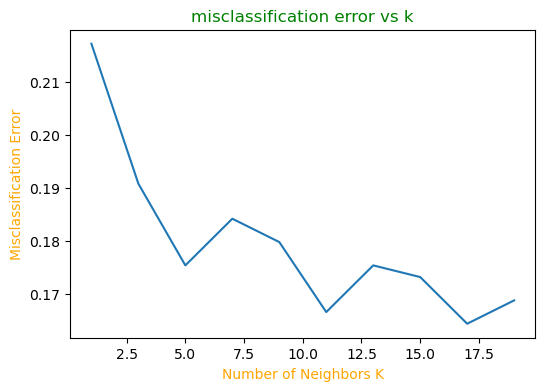

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.title("misclassification error vs k",color='green')
plt.xlabel('Number of Neighbors K',color = 'orange')
plt.ylabel('Misclassification Error',color='orange')
plt.show()

**Building model on parameter K=17**

In [113]:
knn_clf_17 = KNeighborsClassifier(n_neighbors=17)
knn_clf_17.fit(X_train_sc_df,y_train)

KNeighborsClassifier(n_neighbors=17)

**Accuracy of Train and Test data:**

In [114]:
print("Accuracy of Train data: ",knn_clf_17.score(X_train_sc_df,y_train))
print("Accuracy of Test data: ",knn_clf_17.score(X_test_sc_df,y_test))

Accuracy of Train data:  0.8360037700282752
Accuracy of Test data:  0.8355263157894737


**validness of models (over fitting or under fitting)**

* The accuracy of Train and Test are same hence our model is neither overfit nor underfit.

## Bagging (Random Forest should be applied for Bagging)

### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

**Accuracy of Train and Test data:**

In [117]:
print("Accuracy on Train data: ",RF_model.score(X_train,y_train))
print("Accuracy on Test data: ",RF_model.score(X_test,y_test))

Accuracy on Train data:  1.0
Accuracy on Test data:  0.831140350877193


**Observations:**

* Here the difference in the accuracy of Train and Test data is more than 10% ,hence this is an Overfit model.
* This model is not considered good for predicting the Result.
* We can resolve this issue of Overfit by applying GridSearchCV and Bagging Technique on this Model. 

**Applying GridSearchCV on Random Forest:**

In [118]:
Param_grid = {
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf':[5,10,15,20],
              'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2", None],
              'n_estimators':[50,100,150]
             }

In [119]:
grid_search = GridSearchCV(estimator=RF_model,param_grid=Param_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]})

In [120]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100} 

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       random_state=1)


**Building model on best parameters**

In [121]:
best_modelRF = grid_search.best_estimator_

In [122]:
best_modelRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       random_state=1)

**Accuracy of Train and Test data:**

In [123]:
print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

Accuracy on Train data:  0.8699340245051838
Accuracy on Test data:  0.8245614035087719


* On applying GridSearchCV on Random Forest we see that the accuracy of Train and Test data are inline,there is not much issue of overfit and underfit.

### Bagging

In [124]:
from sklearn.ensemble import BaggingClassifier

In [125]:
bgcl_rf = BaggingClassifier(estimator=RF_model,n_estimators=100,max_samples=.50,random_state=1)
bgcl_rf.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=1),
                  max_samples=0.5, n_estimators=100, random_state=1)

**Accuracy of Train and Test data:**

In [124]:
print("Accuracy on Train data: ",bgcl_rf.score(X_train,y_train))
print("Accuracy on Test Data: ",bgcl_rf.score(X_test,y_test))

Accuracy on Train data:  0.9132893496701225
Accuracy on Test Data:  0.831140350877193


## Boosting Technique:

**ADA Boost**

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

**Accuracy of Train and Test data:**

In [128]:
print("Accuracy on Train Data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_model.score(X_test,y_test))

Accuracy on Train Data:  0.8501413760603205
Accuracy on Test Data:  0.8135964912280702


**GridSearchCV on ADA Boost:**

In [129]:
Param_grid = { 'n_estimators' : [50,100,500,1000],
               'learning_rate' : [0.1,0.01,0.001,1.0],
               'algorithm' : ['SAMME', 'SAMME.R']
             }

In [130]:
grid_search = GridSearchCV(estimator=ADB_model,param_grid=Param_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(n_estimators=100, random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 1.0],
                         'n_estimators': [50, 100, 500, 1000]})

In [131]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1000} 

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000,
                   random_state=1)


**Building Model on Best Parameter:**

In [133]:
best_model_Adb = grid_search.best_estimator_
best_model_Adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000,
                   random_state=1)

**Accuracy of Train and Test data:**

In [134]:
print("Accuracy on Train Data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_Adb.score(X_test,y_test))

Accuracy on Train Data:  0.8378887841658812
Accuracy on Test Data:  0.8135964912280702


**Gradient Boosting: Base Model**

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
gbc_model=GradientBoostingClassifier(n_estimators=100,random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

**Accuracy of Train and Test data:**

In [137]:
print("Accuracy on Train Data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test Data: ",gbc_model.score(X_test,y_test))

Accuracy on Train Data:  0.8925541941564562
Accuracy on Test Data:  0.8355263157894737


**GridSearchCV on Gradient Boost:**

In [136]:
Param_grid = {'n_estimators':[50,100,150,200],'criterion' : ['friedman_mse', 'squared_error'],
              'loss' : ['log_loss', 'exponential'],'max_features' : ['sqrt', 'log2'],
               'max_depth':[3,5],'max_leaf_nodes':[2,5]}

In [137]:
grid_search = GridSearchCV(estimator=gbc_model,param_grid=Param_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [138]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'n_estimators': 150} 

GradientBoostingClassifier(loss='exponential', max_depth=5, max_features='sqrt',
                           max_leaf_nodes=5, n_estimators=150, random_state=1)


**Building Model on Best Parameter**

In [139]:
best_model_gdb = grid_search.best_estimator_
best_model_gdb.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=5, max_features='sqrt',
                           max_leaf_nodes=5, n_estimators=150, random_state=1)

**Accuracy of Train and Test data:**

In [140]:
print("Accuracy on Train Data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_gdb.score(X_test,y_test))

Accuracy on Train Data:  0.879359095193214
Accuracy on Test Data:  0.8486842105263158


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

* Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

## Performance Matrices:

## Logistic Regression: Base Model(Unscaled)

**Accuracy of Train and Test data:**

In [138]:
print("Accuracy of Training Data: ",lgt_model.score(X_train,y_train))
print("Accuracy of Test Data: ",lgt_model.score(X_test,y_test))

Accuracy of Training Data:  0.8312912346842601
Accuracy of Test Data:  0.8355263157894737


**Classification Report:**

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

**Training Data**

In [140]:
ytrain_pred = lgt_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

       False       0.74      0.64      0.69       307
        True       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Test Data**

In [141]:
ytest_pred = lgt_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

       False       0.76      0.74      0.75       153
        True       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [142]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

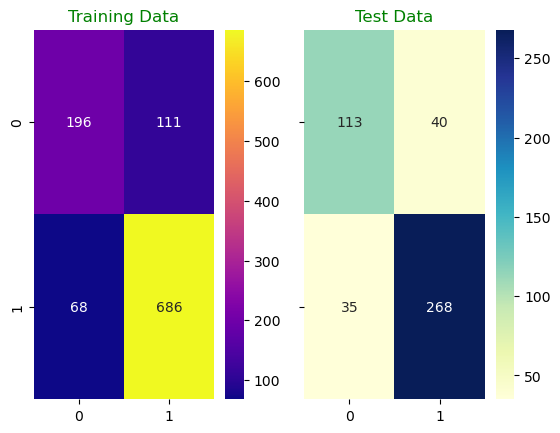

In [143]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');


**Plot ROC curve and get ROC_AUC score:**

**Measuring AUC-ROC Curve - Training Data**

AUC of Training Data: 0.890


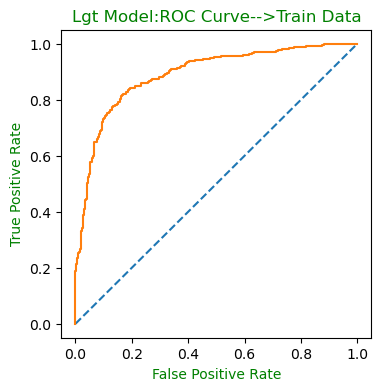

In [144]:
plt.figure(figsize=(4,4))
# Gettin the predictions in terms of probability 
probs = lgt_model.predict_proba(X_train)[:,1] 
# AUC score
auc = roc_auc_score(y_train, probs)
print("AUC of Training Data: {:.3f}".format(auc))
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt Model:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.883


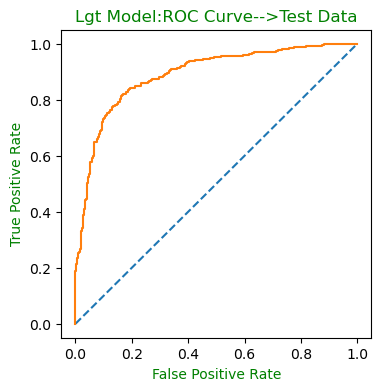

In [145]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lgt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt Model:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Logistic Regression: Base Model(scaled)

**Accuracy of Training and Test data:**


In [149]:
print("Accuracy of the Training Data: ",lgt_scaled.score(X_train_sc_df,y_train))
print("Accuracy of the Test Data: ",lgt_scaled.score(X_test_sc_df,y_test))

Accuracy of the Training Data:  0.8312912346842601
Accuracy of the Test Data:  0.8355263157894737


**Classification Report:**

**Training Data**

In [150]:
ytrain_pred = lgt_scaled.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Test Data**

In [151]:
ytest_pred = lgt_scaled.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [152]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

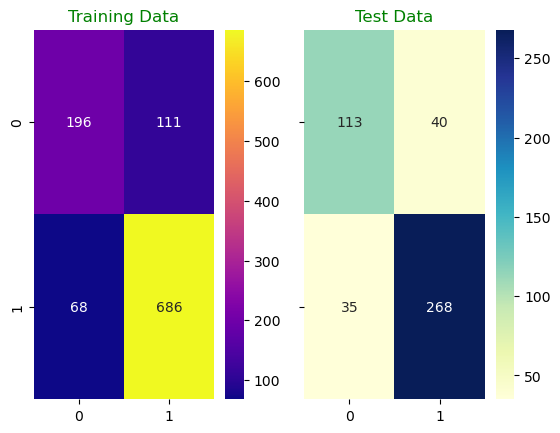

In [153]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');


**AUC and ROC for the Training data:**

AUC: 0.890


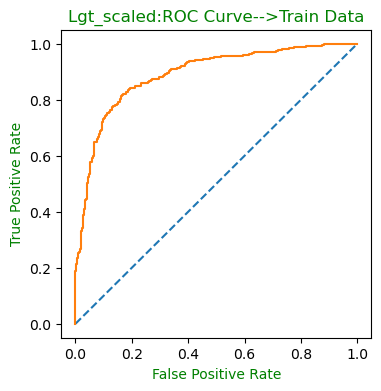

In [154]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lgt_scaled.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt_scaled:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.883


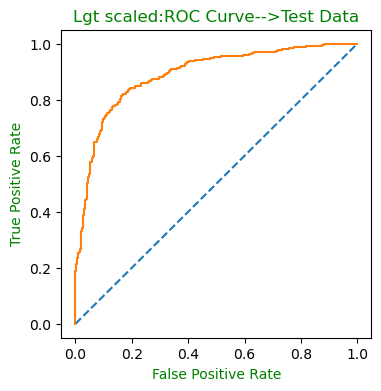

In [155]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lgt_scaled.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt scaled:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Performance metrices for Tuned Model : Logistic Regression

**Accuracy of Train and Test data:**

In [156]:
print("Accuracy of Training Data: ",best_model_lgt.score(X_train,y_train))
print("Accuracy of Test Data: ",best_model_lgt.score(X_test,y_test))

Accuracy of Training Data:  0.8369462770970783
Accuracy of Test Data:  0.8289473684210527


**Classification Report:**

**Training Data**

In [157]:
ytrain_pred = best_model_lgt.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



**Test Data**

In [158]:
ytest_pred = best_model_lgt.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [159]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

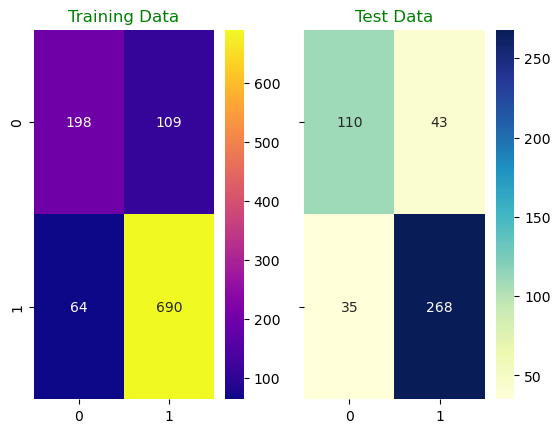

In [160]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');


**AUC and ROC for the Training data:**

AUC: 0.890


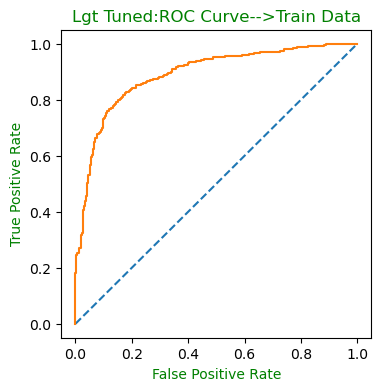

In [161]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_lgt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt Tuned:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.880


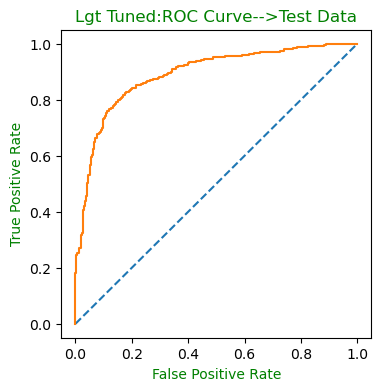

In [162]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_lgt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Lgt Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Linear Descriminanat Analysis: Base Model(Unscaled)

**Accuracy of Train and Test data:**

In [163]:
print("Accuracy of Training Data: ",lda_model.score(X_train,y_train))
print("Accuracy of Test Data: ",lda_model.score(X_test,y_test))

Accuracy of Training Data:  0.8341187558906692
Accuracy of Test Data:  0.8333333333333334


**Classification Report:**

**Training Data**

In [164]:
ytrain_pred = lda_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Test Data**

In [167]:
ytest_pred = lda_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [168]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

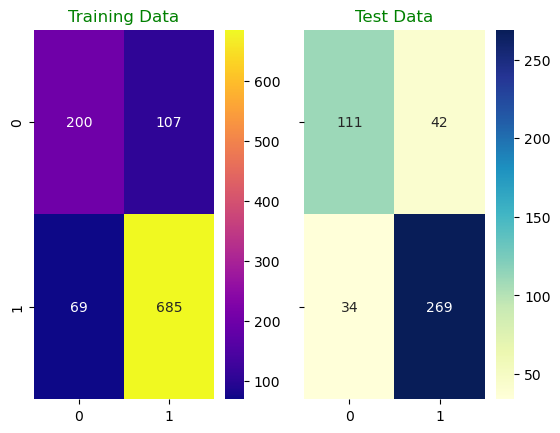

In [169]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the training data:**

AUC: 0.889


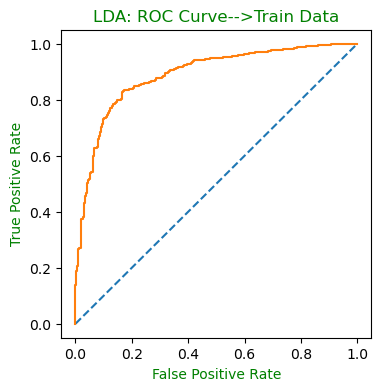

In [170]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("LDA: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.888


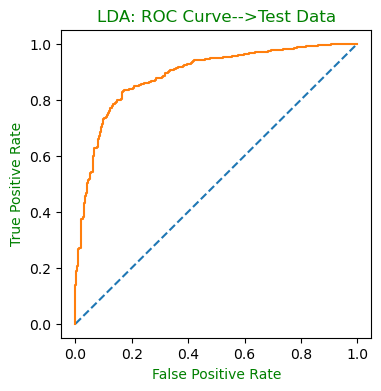

In [171]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("LDA: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Linear Descriminanat Analysis: Base Model(scaled)

**Accuracy of Training and Test data:**

In [172]:
print("Accuracy of the Training Data: ",lda_scaled.score(X_train_sc_df,y_train))
print("Accuracy of the Test Data: ",lda_scaled.score(X_test_sc_df,y_test))

Accuracy of the Training Data:  0.8341187558906692
Accuracy of the Test Data:  0.8333333333333334


**Classification Report:**

**Training Data**

In [173]:
ytrain_pred = lda_scaled.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Test Data**

In [174]:
ytest_pred = lda_scaled.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [175]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

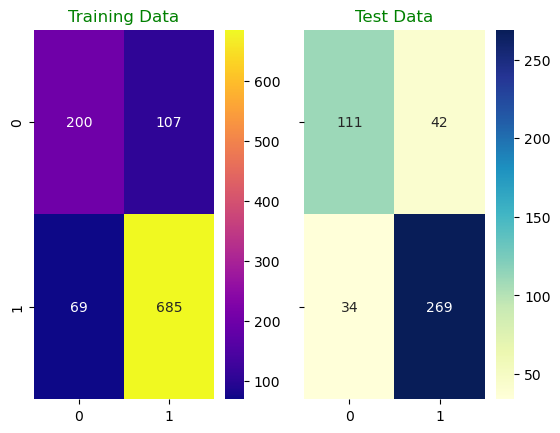

In [176]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.889


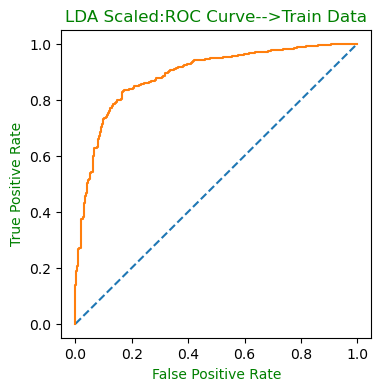

In [177]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_scaled.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("LDA Scaled:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.888


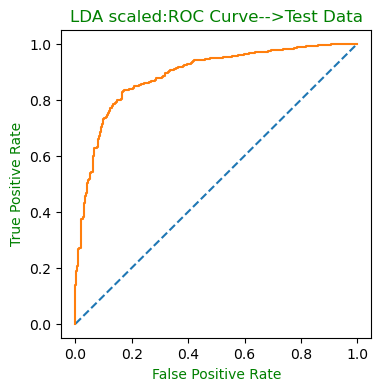

In [178]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_scaled.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("LDA scaled:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### KNeigherestNeighbor Classifier : Base Model(k=9)

**Accuracy of Train and Test data:**

In [179]:
print("Accuracy of Training Data: ",knn_model_sc9.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",knn_model_sc9.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8444863336475024
Accuracy of Test Data:  0.8201754385964912


**Classification Report:**

**Training Data**

In [180]:
ytrain_pred = knn_model_sc9.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



**Test Data**

In [181]:
ytest_pred = knn_model_sc9.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       153
           1       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



**Confusion Matrix for the Training data and Test Data:**

In [182]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

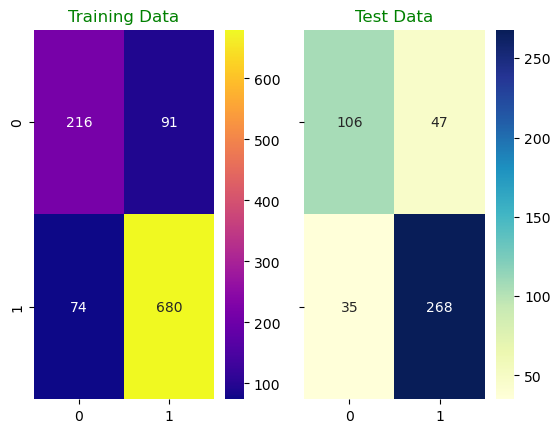

In [183]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.913


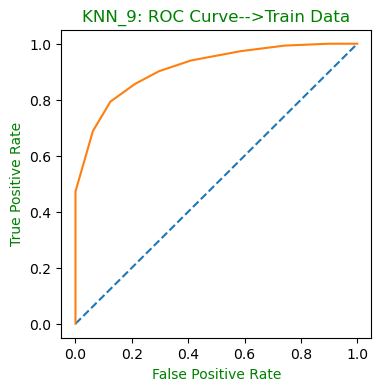

In [184]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model_sc9.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_9: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.888


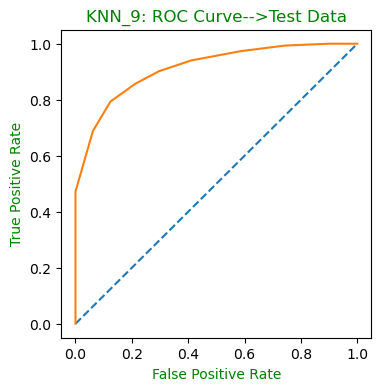

In [185]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model_sc9.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_9: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC ROC curve after n classifier for train data set**

the auc curve 0.903 


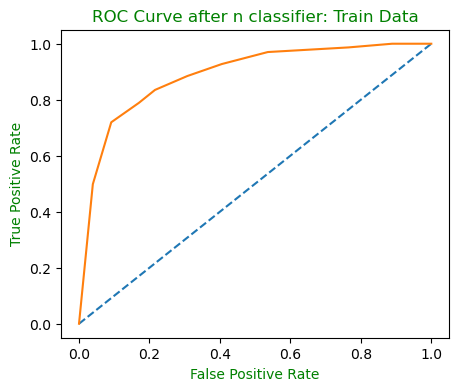

In [186]:
plt.figure(figsize=(5,4))
probs_train=knn.predict_proba(X_train_sc_df)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title("ROC Curve after n classifier: Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr, test_tpr)
plt.show()

**AUC ROC curve after n classifier for Test data set**

the auc curve 0.887 


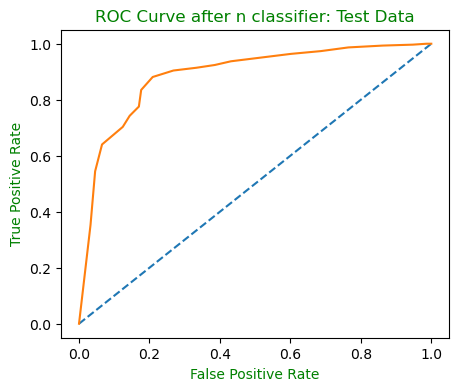

In [187]:
plt.figure(figsize=(5,4))
probs_test=knn.predict_proba(X_test_sc_df)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')

plt.title("ROC Curve after n classifier: Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr, test_tpr)
plt.show()

### KNN : Base Model(k=17)

**Accuracy of Train and Test data:**

In [188]:
print("Accuracy of Training Data: ",knn_clf_17.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",knn_clf_17.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8360037700282752
Accuracy of Test Data:  0.8355263157894737


#### Classification Report:

**Training Data**

In [189]:
ytrain_pred = knn_clf_17.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.84      0.83      1061



**Test data**

In [190]:
ytest_pred = knn_clf_17.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.83      0.84      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [191]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

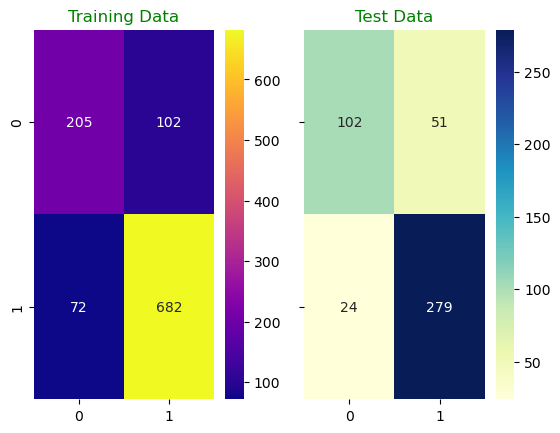

In [192]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.905


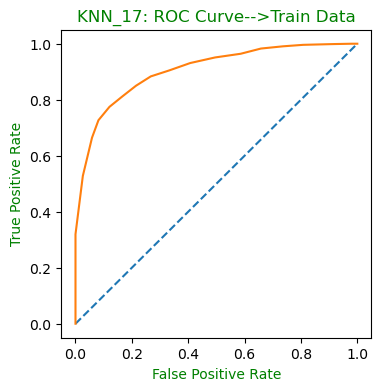

In [193]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_clf_17.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_17: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.888


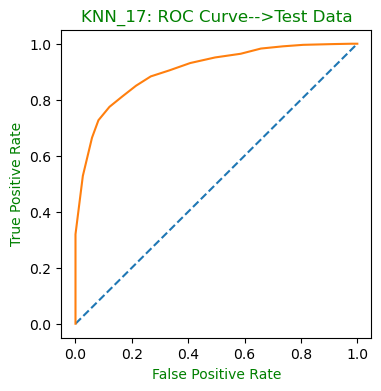

In [194]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_clf_17.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_17: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Performance metrices for Tuned Model : KNN

**Accuracy of Train and Test data:**

In [195]:
print("Accuracy of Training Data: ",best_model_knn.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",best_model_knn.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8473138548539114
Accuracy of Test Data:  0.8157894736842105


#### Classification Report:

**Training Data**

In [196]:
ytrain_pred = best_model_knn.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.85      1061



**Test data**

In [197]:
ytest_pred = best_model_knn.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       153
           1       0.85      0.87      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.81      0.82      0.81       456



**Confusion Matrix for the Training data and Test Data:**

In [198]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

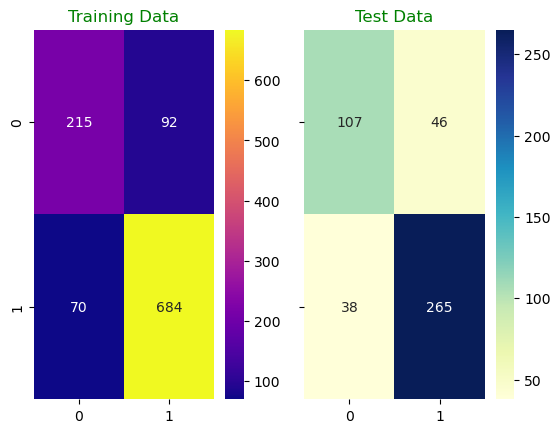

In [199]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.918


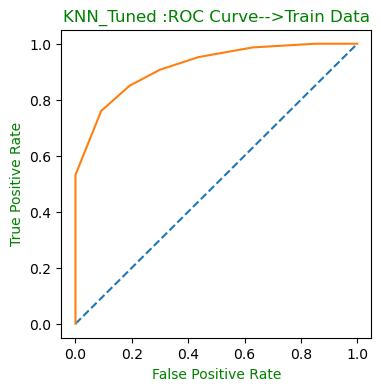

In [200]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_knn.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_Tuned :ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.879


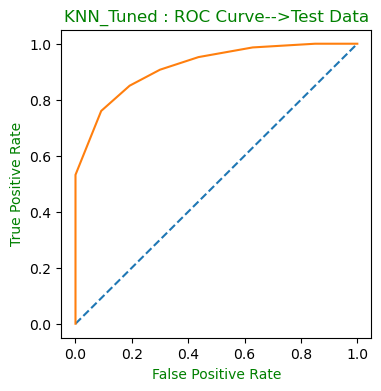

In [201]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_knn.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_Tuned : ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Naive Bayes : Base Model

**Accuracy of Train and Test Data:**

In [202]:
print("Accuracy Score for Training Data is: ", NB_model.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", NB_model.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8350612629594723
Accuracy Score for Test Data is:  0.8223684210526315


**Classification Report:**

**Training Data**

In [203]:
ytrain_pred = NB_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



**Test Data**

In [204]:
ytest_pred = NB_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**Confusion Matrix for the Training data and Test Data:**

In [205]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

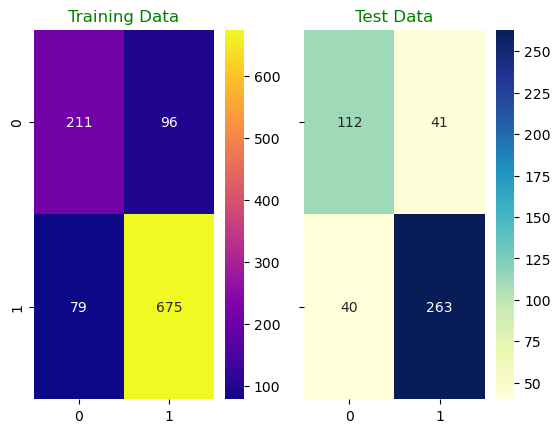

In [206]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.888


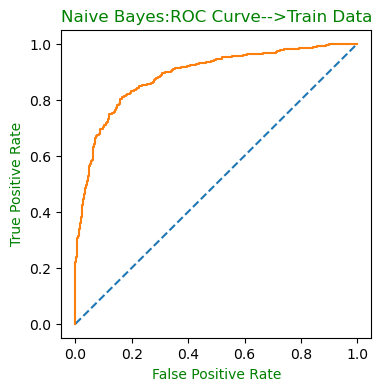

In [207]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Naive Bayes:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.876


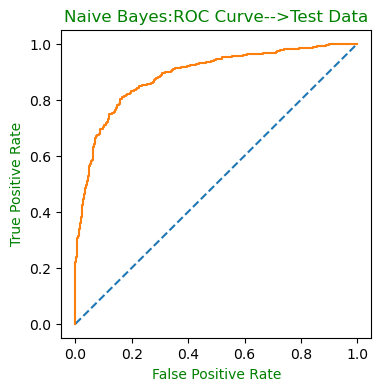

In [208]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Naive Bayes:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Random Forest : Base Model

**Accuracy of Train and Test data:**

In [209]:
print("Accuracy on Train data: ",RF_model.score(X_train,y_train))
print("Accuracy on Test data: ",RF_model.score(X_test,y_test))

Accuracy on Train data:  1.0
Accuracy on Test data:  0.831140350877193


**Classification Report:**

**Training Data**

In [210]:
ytrain_pred = RF_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



**Test Data**

In [211]:
ytest_pred = RF_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [212]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

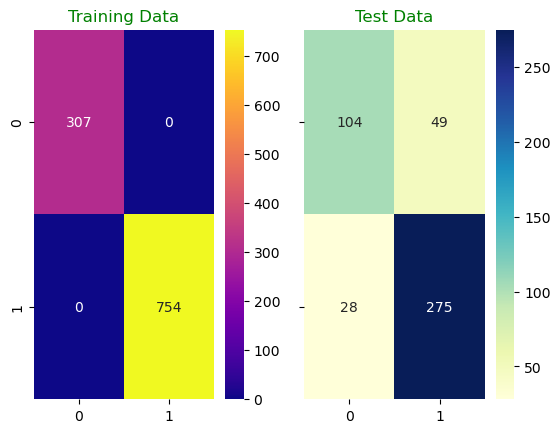

In [213]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 1.000


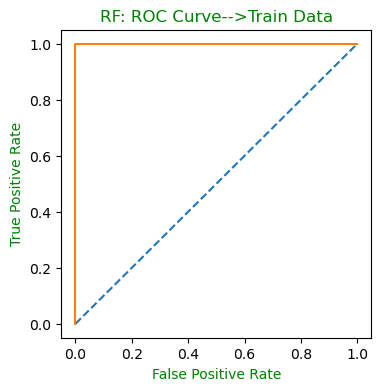

In [214]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("RF: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.895


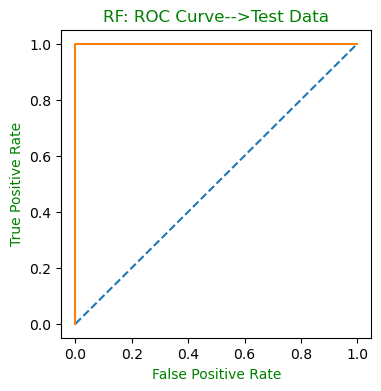

In [215]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("RF: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Performance metrices for Tuned Model : Random Forest ¶

**Accuracy of Train and Test data:**

In [216]:
print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

Accuracy on Train data:  0.8699340245051838
Accuracy on Test data:  0.8245614035087719


**Classification Report:**

**Training Data**

In [217]:
ytrain_pred = best_modelRF.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       307
           1       0.88      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.82      0.83      1061
weighted avg       0.87      0.87      0.87      1061



**Test Data**

In [218]:
ytest_pred = best_modelRF.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       153
           1       0.83      0.92      0.88       303

    accuracy                           0.82       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



**Confusion Matrix for the Training data and Test Data:**

In [219]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

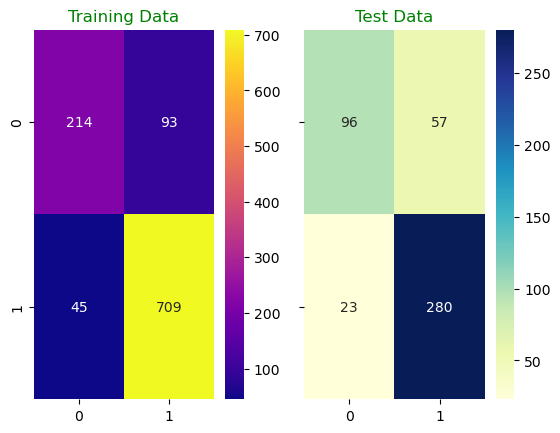

In [220]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.938


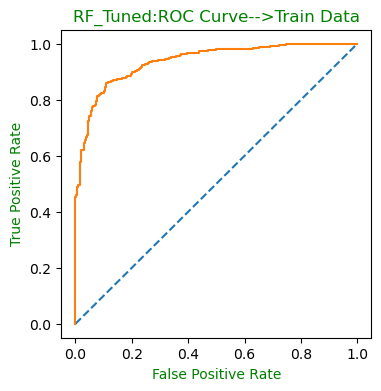

In [221]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_modelRF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("RF_Tuned:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.898


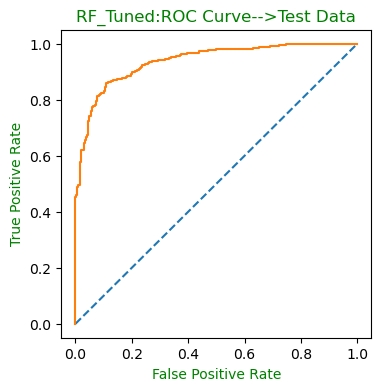

In [222]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_modelRF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("RF_Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Performance metrices : Bagging

**Accuracy of Train and Test data:**

In [223]:
print("Accuracy on Train data: ",bgcl_rf.score(X_train,y_train))
print("Accuracy on Test data: ",bgcl_rf.score(X_test,y_test))

Accuracy on Train data:  0.9132893496701225
Accuracy on Test data:  0.831140350877193


**Classification Report:**

**Training Data**

In [224]:
ytrain_pred = bgcl_rf.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       307
           1       0.92      0.96      0.94       754

    accuracy                           0.91      1061
   macro avg       0.91      0.88      0.89      1061
weighted avg       0.91      0.91      0.91      1061



**Test Data**

In [225]:
ytest_pred = bgcl_rf.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [226]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

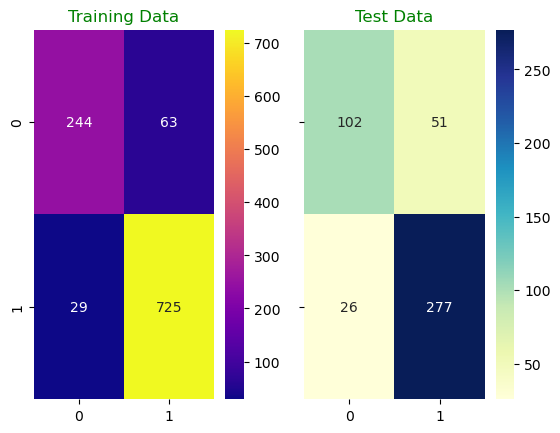

In [227]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.980


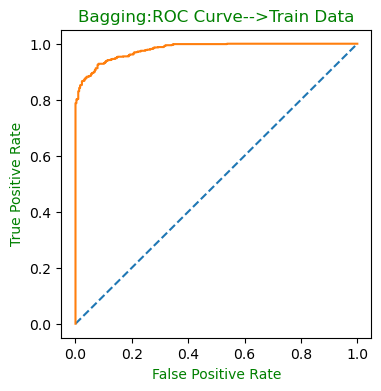

In [228]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Bagging:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.898


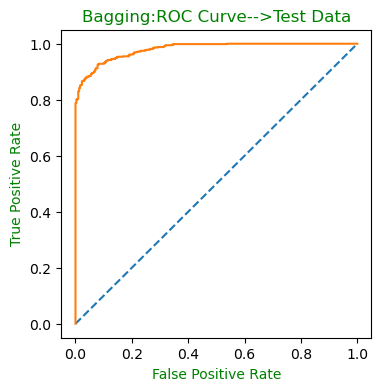

In [229]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Bagging:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

## Performance metrices : Boosting

### ADA Boost : Base Model

**Accuracy of Train and Test data:**

In [230]:
print("Accuracy on Train data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test data: ",ADB_model.score(X_test,y_test))

Accuracy on Train data:  0.8501413760603205
Accuracy on Test data:  0.8135964912280702


**Classification Report:**

**Training Data**

In [231]:
ytrain_pred = ADB_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



**Test Data**

In [232]:
ytest_pred = ADB_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



**Confusion Matrix for the Training data and Test Data:**

In [233]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

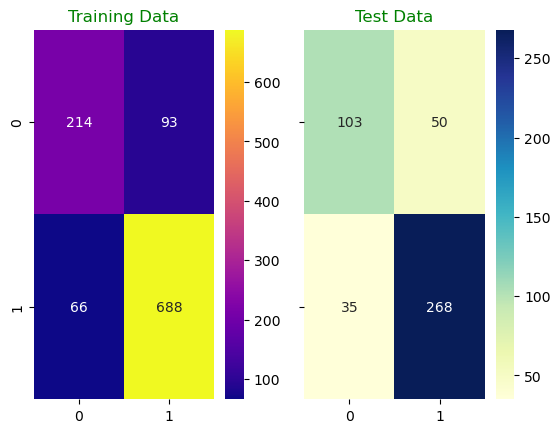

In [234]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.915


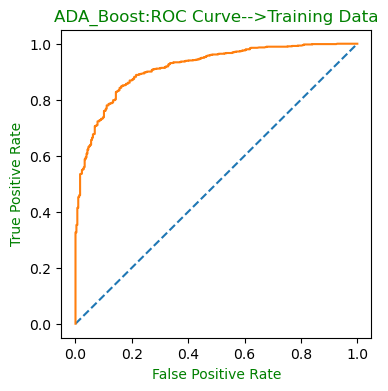

In [235]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADA_Boost:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.877


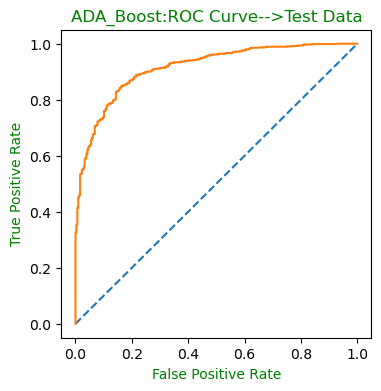

In [236]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADA_Boost:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Performance metrices for Tuned Model : ADA Boost

**Accuracy of Train and Test data:**

In [237]:
print("Accuracy on Train data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test data: ",best_model_Adb.score(X_test,y_test))

Accuracy on Train data:  0.8378887841658812
Accuracy on Test data:  0.8135964912280702


**Classification Report:**

**Training Data**

In [238]:
ytrain_pred = best_model_Adb.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       307
           1       0.86      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



**Test Data**

In [239]:
ytest_pred = best_model_Adb.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



**Confusion Matrix for the Training data and Test Data:**

In [240]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

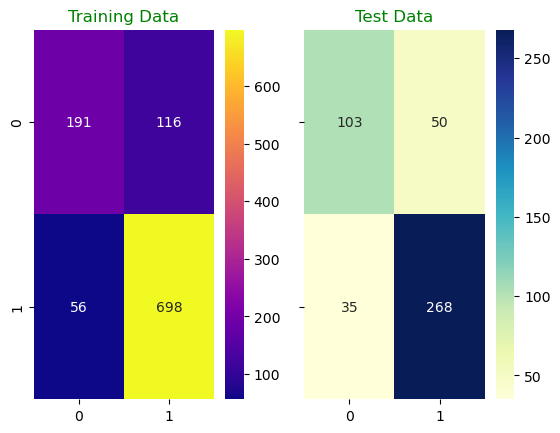

In [241]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.904


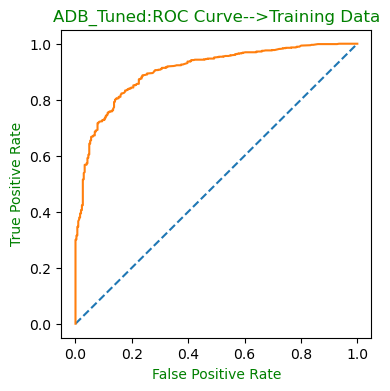

In [242]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_Adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADB_Tuned:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.887


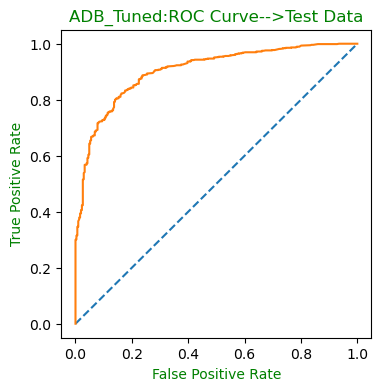

In [243]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_Adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADB_Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Gradient Boost : Base Model

**Accuracy of Train and Test data:**

In [244]:
print("Accuracy on Train data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test data: ",gbc_model.score(X_test,y_test))

Accuracy on Train data:  0.8925541941564562
Accuracy on Test data:  0.8355263157894737


**Classification Report:**

**Training Data**

In [245]:
ytrain_pred = gbc_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



**Test Data**

In [246]:
ytest_pred = gbc_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



**Confusion Matrix for the Training data and Test Data:**

In [247]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

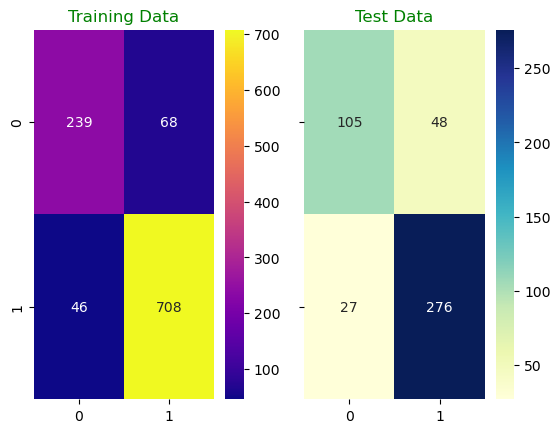

In [248]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.951


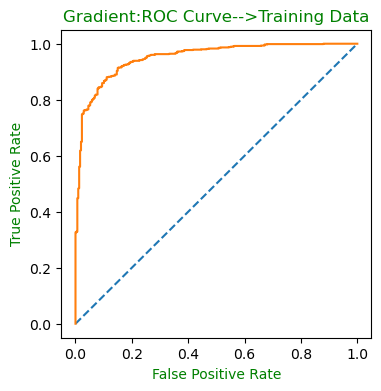

In [249]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = gbc_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Gradient:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.899


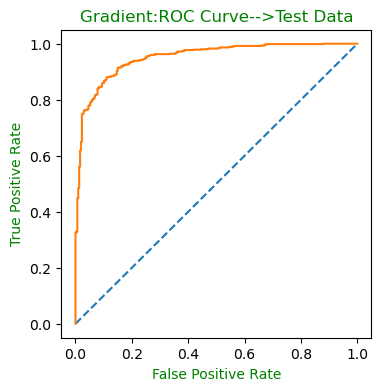

In [250]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = gbc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Gradient:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Performance metrices for Tuned Model : Gradient Boost

**Accuracy of Train and Test data:**

In [251]:
print("Accuracy on Train data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test data: ",best_model_gdb.score(X_test,y_test))

Accuracy on Train data:  0.879359095193214
Accuracy on Test data:  0.8486842105263158


**Classification Report:**

**Training Data**

In [252]:
ytrain_pred = best_model_gdb.predict(X_train)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



**Test Data**

In [253]:
ytest_pred = best_model_gdb.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       153
           1       0.87      0.91      0.89       303

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456



**Confusion Matrix for the Training data and Test Data:**

In [254]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

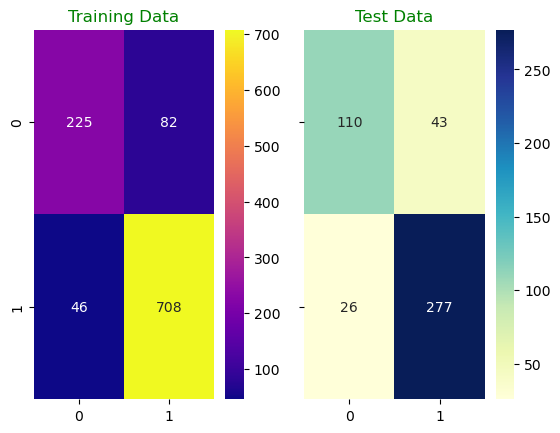

In [255]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

**AUC and ROC for the Training data:**

AUC: 0.944


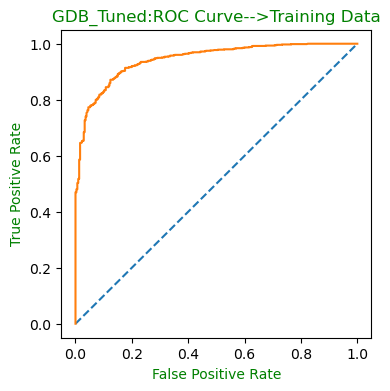

In [256]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_gdb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("GDB_Tuned:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**AUC and ROC for the Test data:**

AUC: 0.905


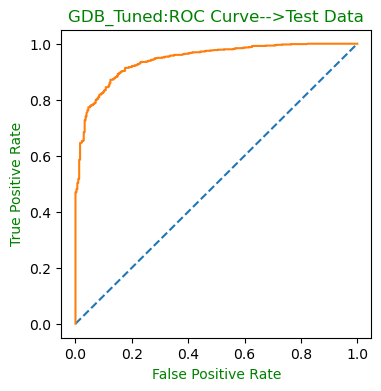

In [257]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_gdb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("GDB_Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

**Comparison of Models**

		
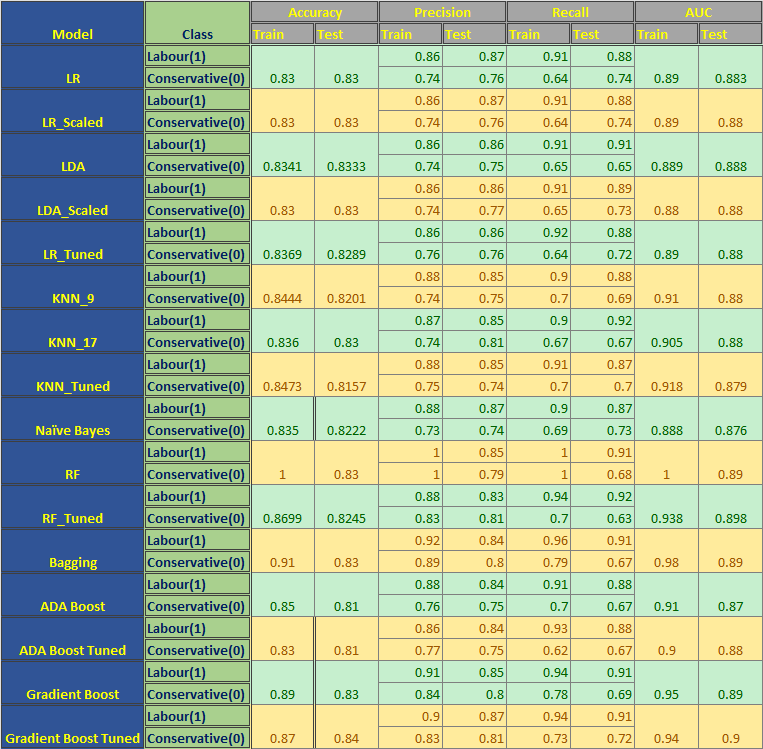

**Observations:**

* On comparing Train and Test result of Logistic Regression and LDA model, We conclude that There is no issue of Overfitting and Underfitting.
* The Accuracy of Train and Test data is same for Log Regression and LDA model with with scaled and unscaled data.
* The Accuracy, Precision and Recall are same for both Train and Test data for both Log Reg and LDA model.Hence these models are considered good for predicting the Results.
* The accuracy of the KNN model(k=17) is same for both Train and Test data.
* Hence there is no issue of overfit and underfit for KNN_17 model.
* The accuracy for the Naive bayes model is also good for Train and Test data.We can say there is no overfit and underfit.
* Random Forest is an Overfit model as the accuracy of Train and Test data is more than 10%.
* Hence we Reject this model(RF) as it is not good model to predict the results.
* Overfitting of RF model is Reduced by applying GridSearchCv and Bagging Technique.
* Tuned RF model is less overfit as compared to Base RF model.
* Rest all other model can be considered good as these are less overfit.


* We will Reject the Random forest base model and Bagging classifier model as these models suffers from Overfiiting and are unreliable for predicting the results.

**Final Model**

* Logistic Regression(LR) and LDA model are Best model as these are not Overfit model.
* The accuracy of Train and Test data is same for LR model and LDA model.
* These model can perform better with unseen data.

## 1.8 Based on these predictions, what are the insights? (5 marks)

**Insights:**

* The chance of Labour party to win the Election is more as compared to the Conservative party as the majority of the votes are casted for the Labour party.
* Female candidate casts more vote as compared to male candidate.Thsi is a helpful insights while considering votes that might be casted in future to win an election.
* Older age group people caste more votes as compared to younger candidates.

**Business Recomendations:**

* Gathering more data will help in the Training the model more accurately and thus improving the predictive powers.
* News channel should gather large sample of the dataset for correct predictions
* Parties should try to attract more Male candidates to increase the vote banks.
* As it evident from the Bivariate analysis that male voters are less in no as compared to female voters.
* For Male voters, more employement oppurtunities should be provided to attract voters as a part of their election compaign.
* For Female voters, Women Empowerment laws should be a part of election compaign.
